# General REDCOMETS test
- It can't handle multivariate time series (the ones that got mutliple channels)

In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))

from helpers import *
from Redcomets import REDCOMETS
from aeon.datasets import load_unit_test
from aeon.datasets import load_gunpoint
from aeon.datasets import load_basic_motions

## Unit Test 

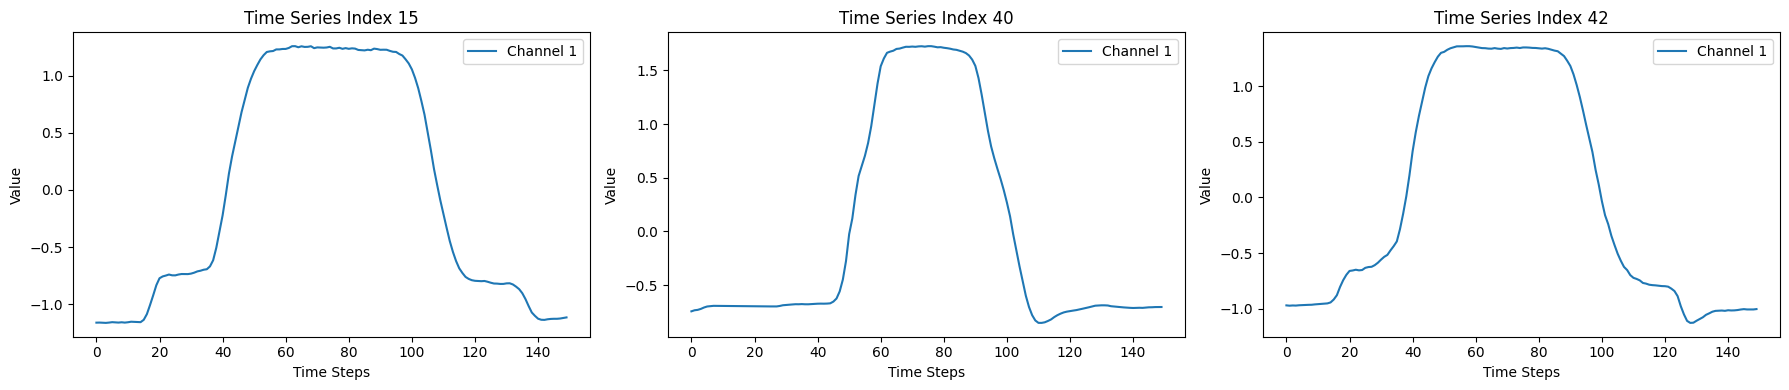

In [2]:
# Load Data
Xtrain, ytrain = load_gunpoint(split="TRAIN")
#Xtrain, ytrain = load_basic_motions(split="TRAIN")
#Xtrain, ytrain = load_unit_test(split="train")


Xtest, ytest = load_gunpoint(split="TEST")
#Xtest, ytest = load_basic_motions(split="TEST")
#Xtest, ytest = load_unit_test(split="test")

#Plot them
plot_random_time_series(Xtrain, n = 3)

In [3]:
clf = REDCOMETS(variant = 3)  
clf.fit(Xtrain, ytrain)  

y_pred = clf.predict(Xtest)  

In [4]:
clf.sax_clfs

[(RandomForestClassifier(n_jobs=1), np.float64(0.7690909090909092)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9236363636363636)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.8854545454545455)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.8672727272727274)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9254545454545455)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9254545454545454)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.8290909090909091))]

In [5]:
clf.get_ensemble_proximities(Xtrain, group = "all")

array([[0.        , 0.05552014, 0.0239066 , ..., 0.05277784, 0.00658843,
        0.01106402],
       [0.04040746, 0.        , 0.01018321, ..., 0.07442058, 0.01364137,
        0.01749895],
       [0.03555861, 0.03130199, 0.        , ..., 0.03883022, 0.01695263,
        0.0144198 ],
       ...,
       [0.03701788, 0.06529223, 0.09378727, ..., 0.        , 0.02432502,
        0.0049849 ],
       [0.00863393, 0.01540244, 0.02236101, ..., 0.0169413 , 0.        ,
        0.01074554],
       [0.01049865, 0.01261019, 0.00547293, ..., 0.00556285, 0.00485808,
        0.        ]])

## Static Variable Testing

In [6]:
#Generate random static variables to test algorithm
Xstatic = np.random.rand(Xtrain.shape[0], 45)
Xstatic_test = np.random.rand(Xtest.shape[0], 45)

#To test if None works
# Xstatic = None
# Xstatic_test = None

In [7]:
Xtrain.shape

(50, 1, 150)

In [8]:
rc = REDCOMETS(variant = 3, static = Xstatic)  
rc.fit(Xtrain, ytrain)  

REDCOMETS(static=array([[0.50227024, 0.80927099, 0.28711803, ..., 0.25295988, 0.54391892,
        0.47583264],
       [0.79800544, 0.832689  , 0.33610642, ..., 0.04509547, 0.42184973,
        0.01485201],
       [0.03552709, 0.03020061, 0.27263561, ..., 0.57693796, 0.93737077,
        0.48290488],
       ...,
       [0.3521325 , 0.66198577, 0.71716212, ..., 0.68645305, 0.50820977,
        0.8486384 ],
       [0.5506675 , 0.85339642, 0.89159872, ..., 0.04219529, 0.39643852,
        0.78586843],
       [0.25274171, 0.58414781, 0.68054889, ..., 0.37616102, 0.93972028,
        0.41179401]]))

In [10]:
static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")
static_prox

array([[0.        , 0.03210854, 0.02516537, ..., 0.03292647, 0.01237658,
        0.01405399],
       [0.03435698, 0.        , 0.02568393, ..., 0.04029461, 0.02849279,
        0.02170266],
       [0.0273466 , 0.02755572, 0.        , ..., 0.03044657, 0.03645505,
        0.01285468],
       ...,
       [0.03419267, 0.04530528, 0.03516037, ..., 0.        , 0.03235025,
        0.01296146],
       [0.01589634, 0.02313203, 0.02694871, ..., 0.02407017, 0.        ,
        0.01141696],
       [0.01264778, 0.01862284, 0.00731242, ..., 0.01528923, 0.0099363 ,
        0.        ]])

In [11]:
rc = REDCOMETS(variant = 3, static = None)  
rc.fit(Xtrain, ytrain)  

no_static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")

#Compare the two proximities
print(f"Shape of Xtrain: ", Xtrain.shape)
print("Shape of static_prox: ", static_prox.shape)
print("Shape of no_static_prox: ", no_static_prox.shape)
static_prox == no_static_prox

Shape of Xtrain:  (50, 1, 150)
Shape of static_prox:  (50, 50)
Shape of no_static_prox:  (50, 50)


array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

# Testing Shape Concerns
Why does it add extra rows

In [12]:
# Testing
rc = REDCOMETS(variant = 3, static = None, debug_mode=True)  
rc.fit(Xtrain, ytrain)  

min_neighbours: 24
max_neighbours: 26


X_smote shape: (52, 150)
y_smote shape: (52,)


X_sfa shape: (52, 129)
X_sfa shape: (52, 49)
X_sfa shape: (52, 125)
X_sfa shape: (52, 52)
X_sfa shape: (52, 86)
X_sfa shape: (52, 114)
X_sfa shape: (52, 24)


REDCOMETS(debug_mode=True)